In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import decision_regions

dataset = pd.read_csv(r"C:\Users\Ahsan\Downloads\imbalanced_social_network_data.csv")

print(dataset.head(14)) 

    Age  EstimatedSalary  Purchased
0    25            50000          0
1    30            60000          0
2    22            30000          0
3    35            80000          0
4    28            45000          0
5    40            90000          0
6    26            52000          0
7    32            75000          0
8    24            48000          0
9    38            85000          1
10   29            41000          0
11   33            62000          0
12   27            47000          0
13   31            58000          0


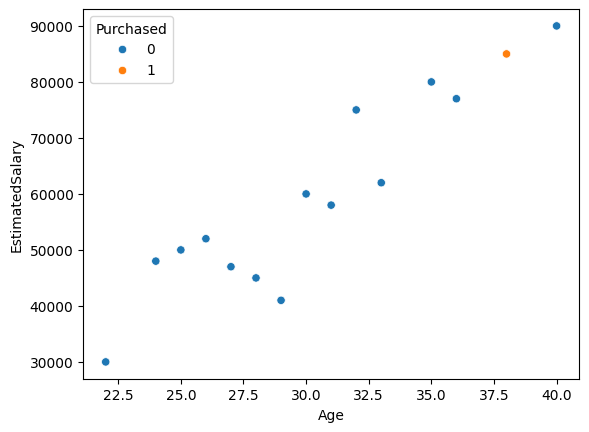

In [30]:
sns.scatterplot(x = "Age" , y = "EstimatedSalary" , data = dataset , hue="Purchased")
plt.show()

In [31]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
x = dataset.iloc[: , :-1]
y = dataset["Purchased"]

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.25, random_state=50)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
dt.score(x_test,y_test)*100

100.0

In [50]:
dt.predict([(25,50000)])

C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


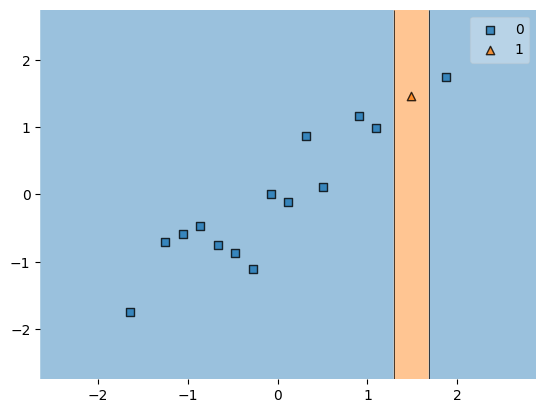

In [55]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()


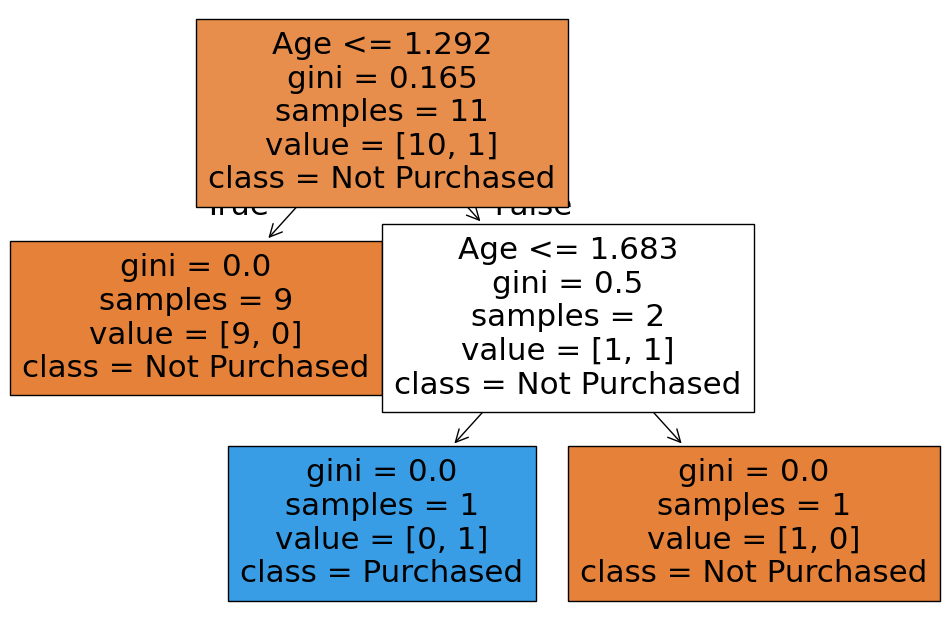

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    filled=True,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased']
)
plt.show()